In [1]:
# #project 2
# import pandas as pd
# from pathlib import Path
# import numpy as np

# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas as hv
# import matplotlib.pyplot as plt
# from sklearn import svm
# from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import datetime as dt
from finta import TA
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 300)

from sklearn.linear_model import LogisticRegression

In [2]:
#Read CSV
Path="Resources/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
price_df= pd.read_csv(Path)
price_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,231079.0,231156.0,231131.0,231660.0,232303.0,232189.0,233004.0,233358.0,234978.0,236222.0,237784.0,239242.0,242128.0,243761.0,244686.0,245518.0,246394.0,249020.0,249559.0,251200.0,250857.0,252853.0,255463.0,258902.0,262192.0,266377.0,271217.0,275049.0,279088.0,281662.0,286647.0,291438.0,297970.0,301747.0,304445.0,307239.0,310102.0,313135.0,315312.0,319584.0,324729.0,332882.0,340698.0,349480.0,357100.0,365522.0,373862.0,380388.0,387779.0,395195.0,405276.0,414387.0,422915.0,431119.0,438104.0,444742.0,450856.

In [3]:
#Filter dataframe
price_df=price_df.drop(columns=["RegionID","SizeRank","RegionName","RegionType","StateName"]).copy()
price_df.tail()

,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
30338,OR,Central Point,Medford,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119439.0,120327.0,120908.0,

In [6]:
#Read CSV
Path="./Resources/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv"
rents_df= pd.read_csv(Path)
rents_df.head()

FileNotFoundError: [Errno 2] No such file or directory: './Resources/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv'

In [ ]:
#Filter dataframe
rents_df=rents_df.drop(columns=["RegionID","SizeRank","MsaName"]).copy()
rents_df.tail()

In [ ]:
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
bayarea_price_df = pd.concat([price_df, rents_df], axis=1, join="inner").dropna()

# View the first and last five rows of the DataFrame
display(bayarea_price_df.head())
display(bayarea_price_df.tail())

In [ ]:
#extract only Bay Area Counties
bayarea_price_df = price_df[price_df["CountyName"].isin(["San Francisco County","San Mateo County","Santa Clara County","Alameda County","Contra Costa County","Marin County", "Sonoma County"])].dropna()
# bayarea_price_df

In [ ]:
#merge rows based on cities and average the prices
bayarea_price_df = bayarea_price_df.groupby("City").mean()
# bayarea_price_df.head(10)
bayarea_price_df.tail(10)

In [ ]:
transposed_bayarea_price_df = bayarea_price_df.transpose()
# transposed_bayarea_price_df

In [ ]:
#percent change of each year
yoy_percent_change=transposed_bayarea_price_df.pct_change().dropna()
# yoy_percent_change

In [ ]:
#percent_change of prices
index_dates=["1996-01-31","2001-01-31","2006-01-31","2011-01-31","2016-01-31","2020-01-31","2020-07-31","2020-10-31","2020-12-31","2021-01-31"]
values_df=pd.DataFrame(transposed_bayarea_price_df, index=index_dates)
values_df

In [ ]:
city_list=list(values_df.columns)
twentyfive_years=[]
twenty_years=[]
fifteen_years=[]
ten_years=[]
five_years=[]
one_year=[]
six_months=[]
three_months=[]
one_month=[]

for city in city_list:
    twentyfive_years.append((values_df[city][9]-values_df[city][0])/values_df[city][0])    
    twenty_years.append((values_df[city][9]-values_df[city][1])/values_df[city][1])    
    fifteen_years.append((values_df[city][9]-values_df[city][2])/values_df[city][2])        
    ten_years.append((values_df[city][9]-values_df[city][3])/values_df[city][3])
    five_years.append((values_df[city][9]-values_df[city][4])/values_df[city][4])    
    one_year.append((values_df[city][9]-values_df[city][5])/values_df[city][5])
    six_months.append((values_df[city][9]-values_df[city][6])/values_df[city][6])
    three_months.append((values_df[city][9]-values_df[city][7])/values_df[city][7])
    one_month.append((values_df[city][9]-values_df[city][8])/values_df[city][8])

print (twentyfive_years,twenty_years,fifteen_years,ten_years,five_years,one_year,six_months,three_months,one_month)

In [ ]:
#one month
one_month_array=np.array(one_month)
round_to_thousands_1m=np.around(one_month_array,4)
one_month_rounded=list(round_to_thousands_1m)

#three months 
three_months_array=np.array(three_months)
round_to_thousands_3m=np.around(three_months_array,4)
three_months_rounded=list(round_to_thousands_3m)

#six months
six_months_array=np.array(six_months)
round_to_thousands_6m=np.around(six_months_array,4)
six_months_rounded=list(round_to_thousands_6m)

#one year
one_year_array=np.array(one_year)
round_to_thousands_1=np.around(one_year_array,4)
one_year_rounded=list(round_to_thousands_1)

#five years
five_years_array=np.array(five_years)
round_to_thousands_5=np.around(five_years_array,4)
five_years_rounded=list(round_to_thousands_5)

#ten years
ten_years_array=np.array(ten_years)
round_to_thousands_10=np.around(ten_years_array,4)
ten_years_rounded=list(round_to_thousands_10)

#fifteen years
fifteen_years_array=np.array(fifteen_years)
round_to_thousands_15=np.around(fifteen_years_array,4)
fifteen_years_rounded=list(round_to_thousands_15)

#twenty years
twenty_years_array=np.array(twenty_years)
round_to_thousands_20=np.around(twenty_years_array,4)
twenty_years_rounded=list(round_to_thousands_20)

#twenty five years
twentyfive_years_array=np.array(twentyfive_years)
round_to_thousands_25=np.around(twentyfive_years_array,4)
twentyfive_years_rounded=list(round_to_thousands_25)


In [ ]:
#pct_change of 0.25, 0.5, 1, 5, 10, 15, 20, 25 years in prices
index_names=["25_years","20_years","15_years","10_years","5_years","1_year","6_months","3_months","1_month"]
growth_df=pd.DataFrame(index=index_names)
for i in range(len(city_list)):
    growth_df[city_list[i]]=[twentyfive_years_rounded[i] , twenty_years_rounded[i] , fifteen_years_rounded[i] , ten_years_rounded[i] , five_years_rounded[i], one_year_rounded[i] , six_months_rounded[i] , three_months_rounded[i] , one_month_rounded[i]]

growth_df=growth_df.transpose()
growth_df

In [ ]:
# Plot the actual returns versus the LR strategy returns
growth_df=growth_df.sort_values('25_years')
growth_df_hvplot = (1 + growth_df[[
    "25_years", "20_years", "15_years", "10_years", "5_years", "1_year", "6_months", "3_months", "1_month"]]
                            ).hvplot(title="YoY Returns - SF Bay Area - Sorted by Returns during the last 25 Years" 
                                              )

growth_df_hvplot.opts(legend_position='top_left').opts(width=800, height=500)

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(growth_df)

In [ ]:
# Create a DataFrame with the scaled data
growth_df_scaled = pd.DataFrame(
    scaled_data,
    columns=growth_df.columns
)

# Copy the crypto names from the original data
growth_df_scaled["City"] = growth_df.index

# Set the City column as index
growth_df_scaled = growth_df_scaled.set_index("City")

# Display sample data
growth_df_scaled.head()

---

# Cluster Cities with K-means

In this section, you will use the K-Means algorithm with a given value for `k` to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters (`n_clusters=5`). 

2. Fit the K-Means model using the scaled data.

3. Predict the clusters to group the cryptocurrencies using the scaled data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the scaled data with the predicted clusters.

In [ ]:
# Initialize the K-Means model with four clusters
model = KMeans(n_clusters=5)

In [ ]:
# Fit the K-Means model using the scaled data
model.fit(growth_df_scaled)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
city_clusters_k4 = model.predict(growth_df_scaled)

# View the resulting array of cluster values.
print(city_clusters_k4)

In [ ]:
# Note: The code for this step is provided for you.

# Add a new column to the DataFrame with the predicted clusters with k=5
growth_df_scaled["city_clusters_k4"] = city_clusters_k4

# Display sample data
growth_df_scaled.head()

In [ ]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_14d"` and `y="price_change_percentage_1y"`.
# Group the results by the clusters using `by="crypto_cluster_k4".
# Set the hover to the coin id using `hover_cols=["coin_id"]`.

growth_df_scaled.hvplot.scatter(
    title="Scatter Plot by City - k=5",
    x="5_years",
    y="25_years",
    by="city_clusters_k4",
    hover_cols=["City"],
    marker=["hex", "square", "inverted_triangle", "triangle"],
).opts(legend_position='bottom_right').opts(width=1000, height=600)

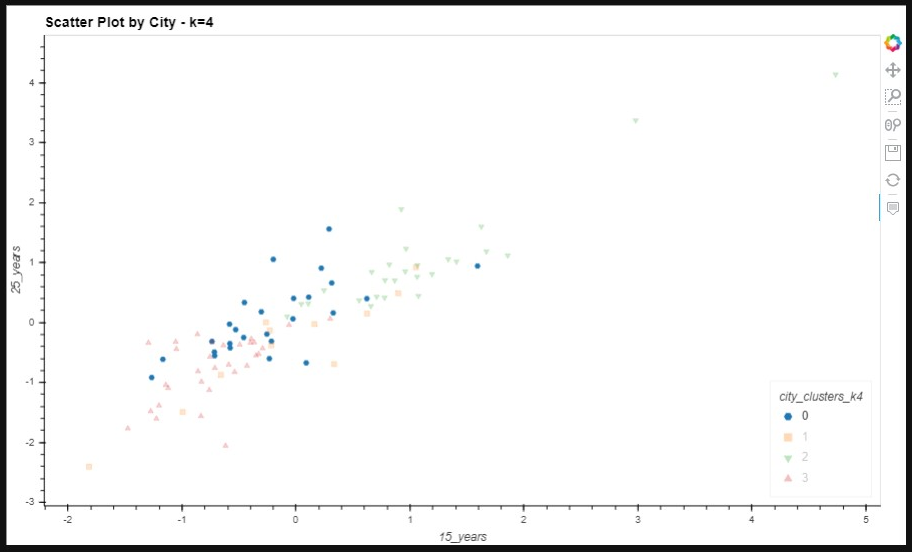



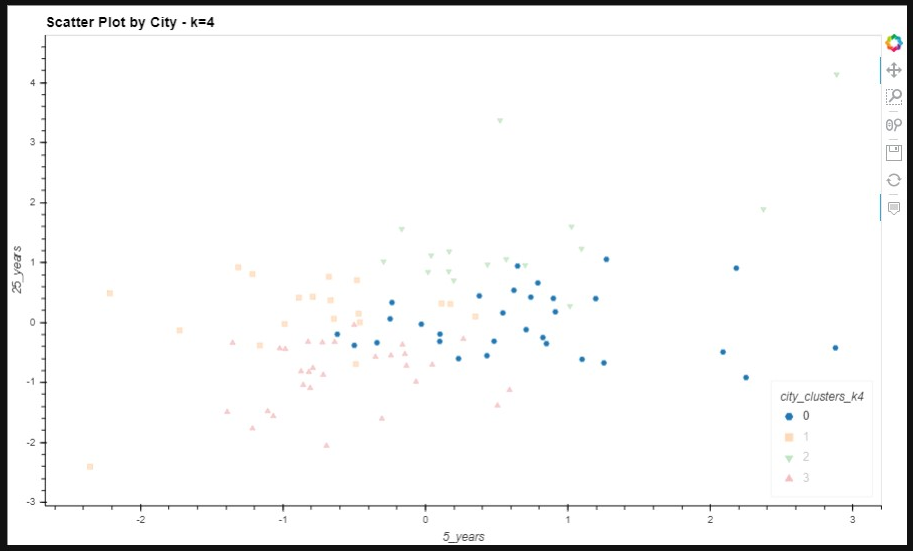

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_0_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["0"])].dropna()

bayarea_0_cities

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_1_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["1"])].dropna()

bayarea_1_cities

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_2_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["2"])].dropna()

bayarea_2_cities

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_3_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["3"])].dropna()

bayarea_3_cities

In [ ]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_14d"` and `y="price_change_percentage_1y"`.
# Group the results by the clusters using `by="crypto_cluster_k4".
# Set the hover to the coin id using `hover_cols=["coin_id"]`.

growth_df_scaled.hvplot.scatter(
    title="Scatter Plot by City - k=5",
    x="1_month",
    y="1_year",
    by="city_clusters_k4",
    hover_cols=["City"],
    marker=["hex", "square", "inverted_triangle", "triangle"],
).opts(legend_position='bottom_right').opts(width=1000, height=600)

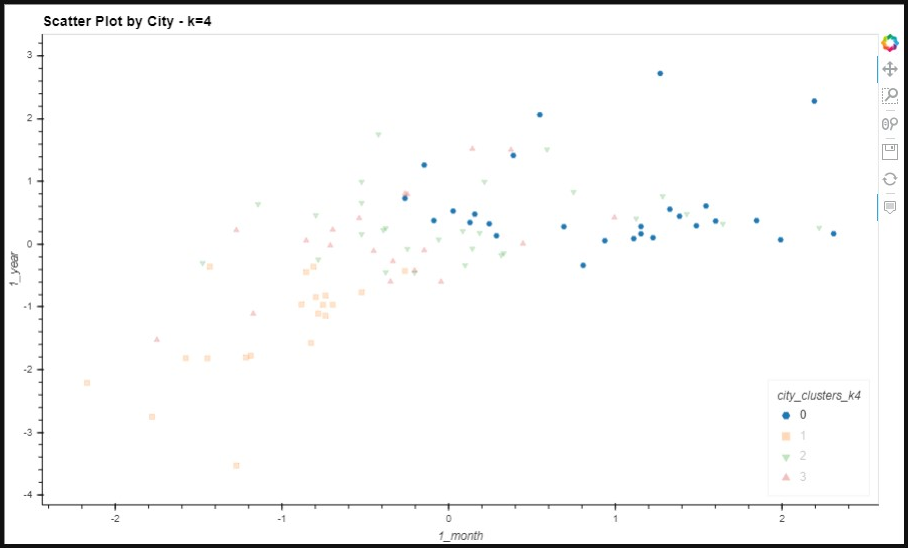

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_0_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["0"])].dropna()

bayarea_0_cities

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_1_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["1"])].dropna()

bayarea_1_cities

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_2_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["2"])].dropna()

bayarea_2_cities

In [ ]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_3_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["3"])].dropna()

bayarea_3_cities

---

In [ ]:
growth_df_scaled.drop(columns=["city_clusters_k4"]).hvplot()


# Find the Best Value for k

In this section, you will use the elbow method to find the best value for k.

1. Code the elbow method algorithm to find the best value for k. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.

3. Answer the following question: What is the best value for k?

In [ ]:
# Create a list with the number of k-values to try
# We use a range from 1 to 11
k = list(range(1, 11))

In [ ]:
# Create an empty list to store the inertia values
inertia = []

In [ ]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inirtia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(growth_df)
    inertia.append(model.inertia_)
    
# View the inertia list
inertia

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

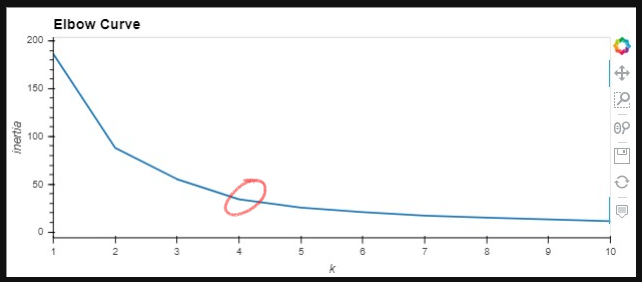

#### 3. Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** 
# THE BEST VALUE FOR `k` IS 5 (k=5).

---

In [ ]:
# Create a PCA model instance and set `n_components=5`.
pca = PCA(n_components=5)

In [ ]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
growth_pca_data = pca.fit_transform(growth_df)

# View the first five rows of the DataFrame. 
growth_pca_data[:5]

In [ ]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_